Examine RMSE and Bias over time in the reconstruction

In [53]:
# =========================================
# For accessing directories
# =========================================

approach = "xg"
run_name = "pCO2-Residual"
root_dir = f"/data/artemis/workspace/vbennington/SOCAT_ML/pCO2_DIC_Taka/models/reconstructions/{approach}"

Modules

In [50]:
# standard imports
import os
import datetime
from pathlib import Path
from collections import defaultdict
import scipy
import random
import numpy as np
import xarray as xr
import pandas as pd
import joblib
import pickle

# machine learning libraries
import sklearn            # machine-learning libary with many algorithms implemented
import xgboost as xgb     # extreme gradient boosting (XGB
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GroupKFold
import sklearn.model_selection as mselect

# Python file with supporting functions
#import pre_SOCAT

import seaborn as sns
import cmocean as cm            # really nice colorbars
import matplotlib.pyplot as plt # for making plots
#from plotting_tools.plotting_tools.spatial_map import SpatialMap
%run ../_define_model_class.ipynb
%run ../_Val_Mapping.ipynb
%run ../_post_functions.ipynb

In [52]:
# Feature and target lists for feeding into ML
features_sel = ['sst', 'sst_anom', 'sss', 'sss_anom', 'mld_log', 'chl_log', 'chl_anom', 'xco2', 'A', 'B', 'C', 'T0', 'T1']
target = 'pCO2'

years = np.array([1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019])

date_range_start = '1982-01-01T00:00:00.000000000'
date_range_end = '2019-12-31T00:00:00.000000000'

# create date vector
dates = pd.date_range(start=date_range_start, 
                      end=date_range_end,freq='MS') + np.timedelta64(14, 'D')

# Bias and RMSE Over Time

In [36]:
# Load reconstruction:
# Do for the five runs:

recon = xr.open_dataset(f"{root_dir}/{approach}_recon_pCO2_2D_mon_ensemble_mean_198201-201912.nc")

model = recon[f"{target}_recon"]
truth = recon[target]

model_test = recon[f"{target}_DIC_test_recon"] # Will be all NaNs for ensemble 
truth_test = recon[f"{target}_DIC_test"]  # 

In [40]:
bias_over_time = (model - truth).mean(["ylat","xlon"]).groupby("time.year").mean("time")

Text(0.5,1,'pCO2-Residual Bias')

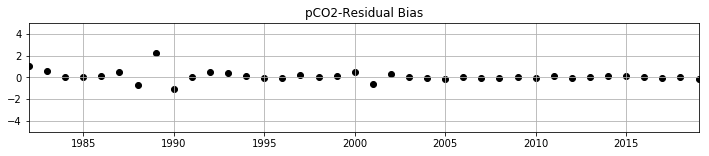

In [48]:
fig = plt.subplots(1,1,figsize=(12,2))
plt.scatter(years,bias_over_time,color="black")
plt.grid(True)
plt.xlim(min(years),max(years))
plt.ylim(-5,5)
plt.title(f"{run_name} Bias")

Text(0.5,1,'pCO2-Residual Test Bias')

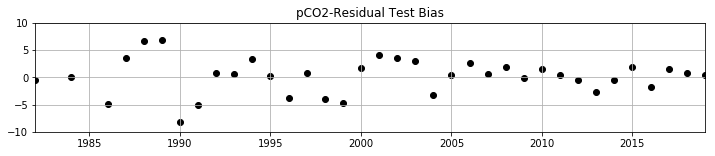

In [10]:
fig = plt.subplots(1,1,figsize=(12,2))
plt.scatter(years,test_bias,color="black")
plt.grid(True)
plt.xlim(min(years),max(years))
plt.ylim(-10,10)
plt.title(f"{run_name} Test Bias")

In [43]:
mse = ((model - truth)**2).mean(["ylat","xlon"]).groupby("time.year").mean("time")
test_mse = ((model_test - truth_test)**2).mean(["ylat","xlon"]).groupby("time.year").mean("time")

Text(0.5,1,'pCO2-Residual RMSE')

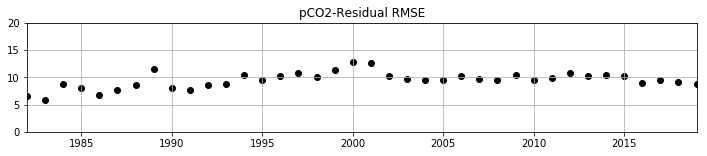

In [44]:
fig = plt.subplots(1,1,figsize=(12,2))
plt.scatter(years,mse**.5,color="black")
plt.grid(True)
plt.xlim(min(years),max(years))
plt.ylim(0,20)
plt.title(f"{run_name} RMSE")

Text(0.5,1,'pCO2-Residual Test RMSE')

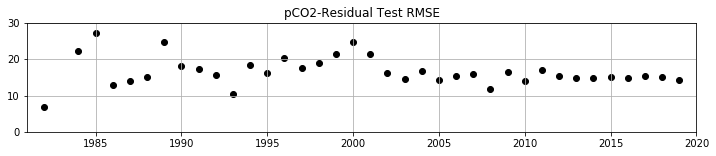

In [13]:
fig = plt.subplots(1,1,figsize=(12,2))
plt.scatter(years,test_mse**.5,color="black")
plt.grid(True)
plt.xlim(min(years)-1,max(years)+1)
plt.ylim(0,30)
plt.title(f"{run_name} Test RMSE")

In [45]:
bias_map = (model-truth).mean("time")
rmse_map = ((model-truth)**2).mean("time")**.5

test_bias_map = (model_test-truth_test).mean("time")
test_rmse_map = ((model_test-truth_test)**2).mean("time")**.5

Text(0.5,1,'pCO2-Residual Bias')

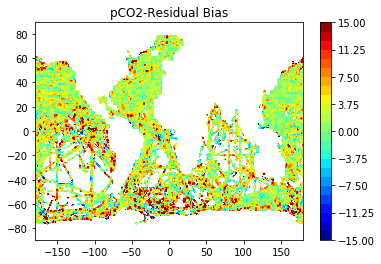

In [46]:
fig = plt.figure()
plt.contourf(bias_map.xlon,bias_map.ylat,bias_map.transpose(),levels=np.linspace(-15,15,25),cmap='jet')
plt.colorbar()
plt.title(f"{run_name} Bias")

Text(0.5,1,'pCO2-Residual Test Bias')

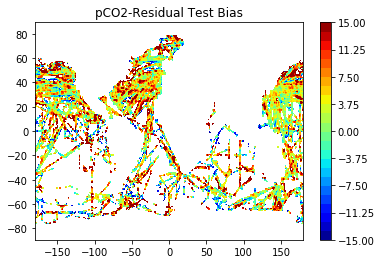

In [16]:
fig = plt.figure()
plt.contourf(bias_map.xlon,bias_map.ylat,test_bias_map.transpose(),levels=np.linspace(-15,15,25),cmap='jet')
plt.colorbar()
plt.title(f"{run_name} Test Bias")

Text(0.5,1,'pCO2-Residual RMSE')

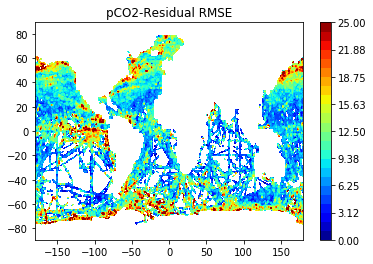

In [47]:
fig = plt.figure()
plt.contourf(bias_map.xlon,bias_map.ylat,rmse_map.transpose(),levels=np.linspace(0,25,25),cmap='jet')
plt.colorbar()
plt.title(f"{run_name} RMSE")

Text(0.5,1,'pCO2-Residual Test RMSE')

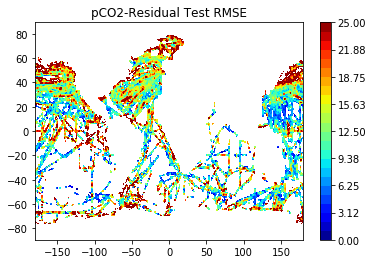

In [18]:
fig = plt.figure()
plt.contourf(bias_map.xlon,bias_map.ylat,test_rmse_map.transpose(),levels=np.linspace(0,25,25),cmap='jet')
plt.colorbar()
plt.title(f"{run_name} Test RMSE")